<a href="https://colab.research.google.com/github/AlexDawes-01/AlexDawes-Engineering_Portfolio/blob/main/Stress_Cylinders_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solution vector x (Constants for solution of elasticity equation of displacment):
[ 7.28681336e-03 -1.42829666e-04  1.91252721e-04 -5.69733822e-05
  2.98030708e-03 -1.57658245e-04]

Stress Analysis at Key Locations:

First Interface (Mg0-Graphite):
Radial stress: -38.1 MPa (COMPRESSION)
Circumferential stress (Mg0): -401.3 MPa (COMPRESSION)
Circumferential stress (Graphite): 7.8 MPa (TENSION)

Second Interface (Graphite-Zircon):
Radial stress: -62.9 MPa (COMPRESSION)
Circumferential stress (Graphite): 13.9 MPa (TENSION)
Circumferential stress (Zircon): -130.1 MPa (COMPRESSION)


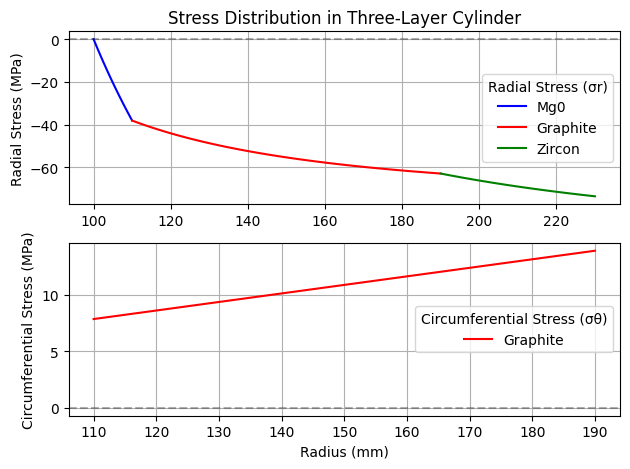

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Set up the material properties, calculate lames constants, input temperature increase, cylinder radii
# Material Properties (assuming same for all regions for simplicity)


# Inner cylinder properties (inner cylinder)
E1 = 20e9 # Young's modulus (Pa)
nu1 = 0.3 # Poisson's ratio
alpha1 = 13e-6 # Thermal expansion coefficient (1/°C)

# Graphite properties (middle cylinder)
E2 = 10.3e9 # Young's modulus (Pa)
nu2 = 0.3 # Poisson's ratio
alpha2 = 4e-6 # Thermal expansion coefficient (1/°C)

# Outer cylinder
E3 = 10e9 # Young's modulus (Pa)
nu3 = 0.3 # Poisson's ratio
alpha3 = 8e-6 # Thermal expansion coefficient (1/°C) - Much lower

# Calculate Lamé constants
mu1 = E1 / (2 * (1 + nu1))
lambda1 = E1 * nu1 / ((1 + nu1) * (1 - 2 * nu1))

mu2 = E2 / (2 * (1 + nu2))
lambda2 = E2 * nu2 / ((1 + nu2) * (1 - 2 * nu2))

mu3 = E3 / (2 * (1 + nu3))
lambda3 = E3 * nu3 / ((1 + nu3) * (1 - 2 * nu3))

# Temperature increase
dt = 1000 #1000 K effective mean increase in temperature when melting slag.

# Geometry (in meters)
r1 = 0.1 # Inner radius
r2 = 0.11 # First interface radius
r3 = 0.19 # Second interface radius
r4 = 0.23 # Outer radius
Height=0.25 #Height in meters (m)

# Set up system of equations
# [M]{x} = {b} where x = [A1, B1, A2, B2, A3, B3]
A = np.zeros((6, 6))
b = np.zeros(6)

# Fill in the components of the A matrix  (6x6 matrix A)
#First row (anything left blank was initialisewd as a zero)
A[0,0]=r2
A[0,1]=1/r2
A[0,2]=-r2
A[0,3]=-1/r2

#Second row
A[1,2]=r3
A[1,3]=1/r3
A[1,4]=-r3
A[1,5]=-1/r3

#Third row
A[2,4]=r4
A[2,5]=1/r4

#Fourth Row
A[3,0]=((2*lambda1)+(2*mu1))
A[3,1]=(-2*mu1)/(r1**2)
b[3]=(2*lambda1*alpha1*dt)+(2*mu1*alpha1*dt)

#Fifth row
A[4,0]=(2*mu1+2*lambda1)
A[4,1]=(-2*mu1)/(r2**2)
A[4,2]=-((2*mu2)+(2*lambda2))
A[4,3]=(2*mu2)/(r2**2)
b[4]=(2*lambda1*alpha1*dt)+(2*mu1*alpha1*dt)+(-2*lambda2*alpha2*dt)+(-2*mu2*alpha2*dt)

#Sixth row
A[5,2]=((2*lambda2)+(2*mu2))
A[5,3]=(-2*mu2)/(r3**2)
A[5,4]=-((2*lambda3)+(2*mu3))
A[5,5]=(2*mu3)/(r3**2)
b[5]=(2*lambda2*alpha2*dt)+(2*mu2*alpha2*dt)+(-2*lambda3*alpha3*dt)+(-2*mu3*alpha3*dt)


# Solve the system of equations (Ax = b)
try:
    x = np.linalg.solve(A, b)
    print("Solution vector x (Constants for solution of elasticity equation of displacment):")
    A1, B1, A2, B2, A3, B3 = x
    print(x)
except np.linalg.LinAlgError as e:
    print(f"Error solving system: {e}")


# Calculate stresses at various radii
r_points1 = np.linspace(r1, r2, 50)
r_points2 = np.linspace(r2, r3, 50)
r_points3 = np.linspace(r3, r4, 50)


sigma_r1 = (2*lambda1*(A1-alpha1*dt)+2*mu1*(A1-(B1/r_points1**2)-alpha1*dt))
sigma_theta1 =  (2*lambda1*(A1-alpha1*dt)+2*mu1*(A1+(B1/r_points1**2)-alpha1*dt))

sigma_r2 =  (2*lambda2*(A2-alpha2*dt)+2*mu2*(A2-(B2/r_points2**2)-alpha2*dt))
sigma_theta2 = (2*lambda2*(A2-alpha2*dt)+2*mu2*(A2+(B2/r_points2**2)-alpha2*dt))

sigma_r3 = (2*lambda3*(A3-alpha3*dt)+2*mu3*(A3-(B3/r_points3**2)-alpha3*dt))
sigma_theta3 = (2*lambda3*(A3-alpha3*dt)+2*mu3*(A3+(B3/r_points3**2)-alpha3*dt))


sigma_theta2 = ((((sigma_r1[-1]*r2**2)-(sigma_r3[0]*r3**2))*(r_points2))+((sigma_r3[0]-sigma_r1[-1])*((r2**2)*(r3**2))))/((r3**2)-(r2**2))

# Convert to MPa
sigma_r1 /= 1e6
sigma_theta1 /= 1e6
sigma_r2 /= 1e6
sigma_theta2 /= 1e6
sigma_r3 /= 1e6
sigma_theta3 /= 1e6

# Print key results with clear tension/compression indication
def stress_state(stress):
    return "TENSION" if stress > 0 else "COMPRESSION"

print("\nStress Analysis at Key Locations:")
print("\nFirst Interface (Mg0-Graphite):")
print(f"Radial stress: {sigma_r2[0]:.1f} MPa ({stress_state(sigma_r2[0])})")
print(f"Circumferential stress (Mg0): {sigma_theta1[-1]:.1f} MPa ({stress_state(sigma_theta1[-1])})")
print(f"Circumferential stress (Graphite): {sigma_theta2[0]:.1f} MPa ({stress_state(sigma_theta2[0])})")

print("\nSecond Interface (Graphite-Zircon):")
print(f"Radial stress: {sigma_r2[-1]:.1f} MPa ({stress_state(sigma_r2[-1])})")
print(f"Circumferential stress (Graphite): {sigma_theta2[-1]:.1f} MPa ({stress_state(sigma_theta2[-1])})")
print(f"Circumferential stress (Zircon): {sigma_theta3[0]:.1f} MPa ({stress_state(sigma_theta3[0])})")


# Plot radial stresses
plt.subplot(2, 1, 1)
plt.plot(r_points1*1000, sigma_r1, 'b-', label='Mg0')
plt.plot(r_points2*1000, sigma_r2, 'r-', label='Graphite')
plt.plot(r_points3*1000, sigma_r3, 'g-', label='Zircon')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.ylabel('Radial Stress (MPa)')
plt.title('Stress Distribution in Three-Layer Cylinder')
plt.grid(True)
plt.legend(title='Radial Stress (σr)')

# Plot circumferential stresses
plt.subplot(2, 1, 2)
#plt.plot(r_points1*1000, sigma_theta1, 'b-', label='Mg0')
plt.plot(r_points2*1000, sigma_theta2, 'r-', label='Graphite')
#plt.plot(r_points3*1000, sigma_theta3, 'g-', label='Zircon')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.xlabel('Radius (mm)')
plt.ylabel('Circumferential Stress (MPa)')
plt.grid(True)
plt.legend(title='Circumferential Stress (σθ)')

plt.tight_layout()
plt.show()